In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import aos
import pytest
import numpy as np
from aos.state import ZernikeState
from aos.telescope import ZernikeTelescope
from aos.simulator import DonutSimulator, WavefrontSimulator
from aos.estimator import WavefrontEstimator

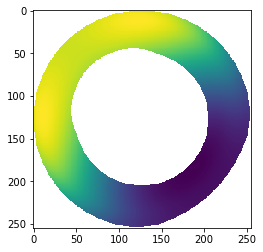

In [2]:
state = ZernikeState()
tel = ZernikeTelescope.nominal()
tel.update(state)
wsim = WavefrontSimulator()
img = wsim.simulateWavefront(tel.optic, 1.15, 1.15)
plt.imshow(img)

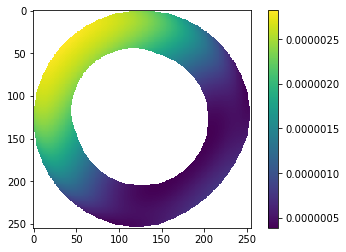

In [7]:
state = ZernikeState()
state['m1m3zer5'] = 1e-7
tel = ZernikeTelescope.nominal()
tel.update(state)
wsim = WavefrontSimulator()
img = wsim.simulateWavefront(tel.optic, 1.15, 1.15)
plt.imshow(img)
plt.colorbar()

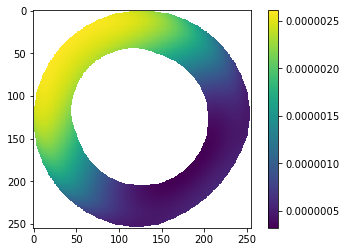

In [8]:
state = ZernikeState()
state['m2zer5'] = -1e-7
tel = ZernikeTelescope.nominal()
tel.update(state)
wsim = WavefrontSimulator()
img2 = wsim.simulateWavefront(tel.optic, 1.15, 1.15)
plt.imshow(img2)
plt.colorbar()

In [15]:
max1 = np.max(img[np.logical_not(np.isnan(img))])

In [16]:
max2 = np.max(img2[np.logical_not(np.isnan(img2))])

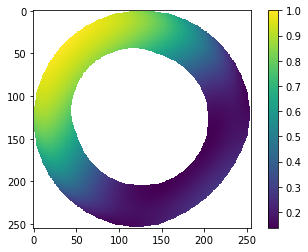

In [18]:
plt.imshow(img / max1)
plt.colorbar()

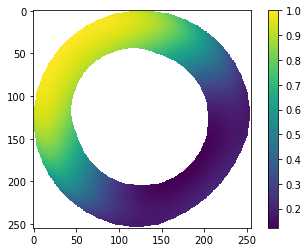

In [19]:
plt.imshow(img2 / max2)
plt.colorbar()

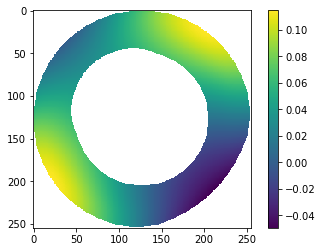

In [21]:
plt.imshow((img2 / max2) - (img / max1))
plt.colorbar()

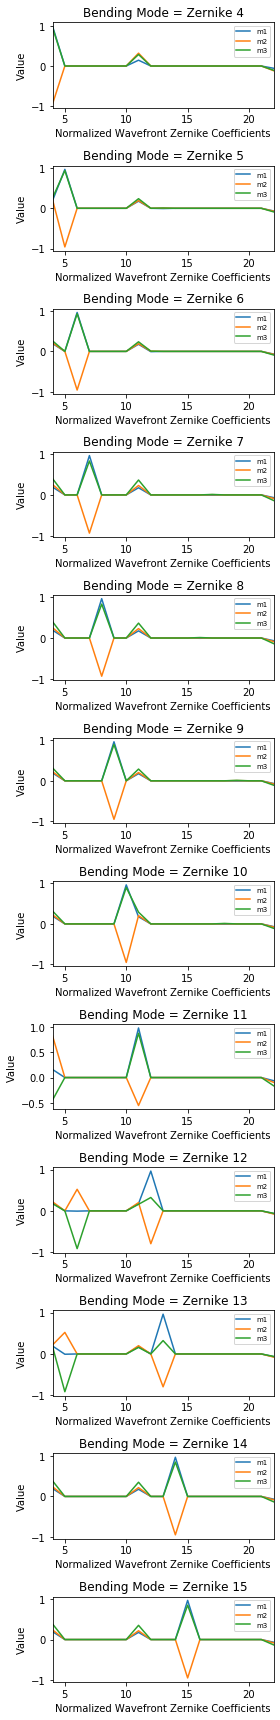

In [18]:
west = WavefrontEstimator()

for i in range(4,16):
    st = ZernikeState()
    st[f'm1zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, 0, 0)
    coef1 = west.estimate(wf)[4:]
    coef1 /= np.linalg.norm(coef1)
    
    st = ZernikeState()
    st[f'm2zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, 0, 0)
    coef2 = west.estimate(wf)[4:]
    coef2 /= np.linalg.norm(coef2)
    
    st = ZernikeState()
    st[f'm3zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, 0, 0)
    coef3 = west.estimate(wf)[4:]
    coef3 /= np.linalg.norm(coef3)

    plt.subplot(12,1,i-3)
    plt.title(f'Bending Mode = Zernike {i}')
    plt.plot(range(4,23), coef1, label='m1')
    plt.plot(range(4,23), coef2, label='m2')
    plt.plot(range(4,23), coef3, label='m3')
    plt.xlim([4,22])
    plt.ylabel('Value')
    plt.xlabel('Normalized Wavefront Zernike Coefficients')
    plt.legend(fontsize=7)
plt.gcf().set_size_inches((4,24))
plt.tight_layout()
plt.savefig('bendingModesDegeneracy.png', bbox='tight', dpi=180);

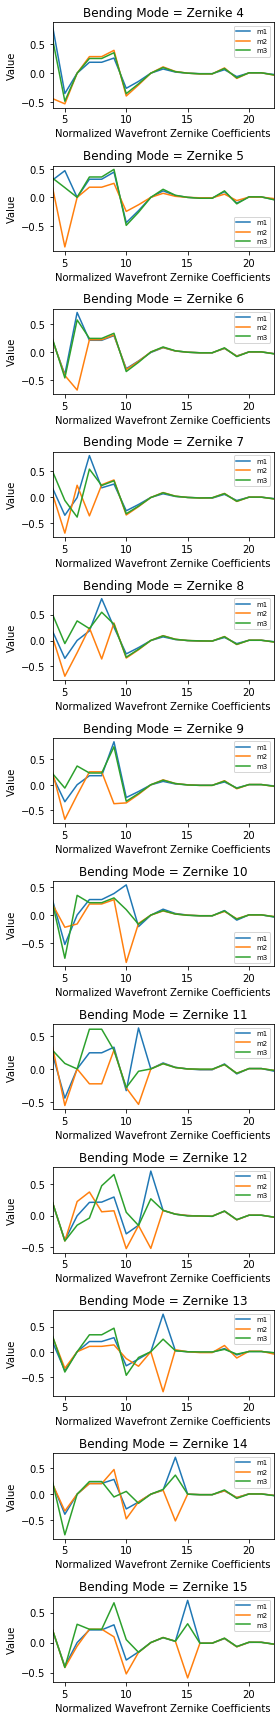

In [17]:
west = WavefrontEstimator()
fx, fy = 1.15, 1.15
for i in range(4,16):
    st = ZernikeState()
    st[f'm1zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef1 = west.estimate(wf)[4:]
    coef1 /= np.linalg.norm(coef1)
    
    st = ZernikeState()
    st[f'm2zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef2 = west.estimate(wf)[4:]
    coef2 /= np.linalg.norm(coef2)
    
    st = ZernikeState()
    st[f'm3zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef3 = west.estimate(wf)[4:]
    coef3 /= np.linalg.norm(coef3)
    
    plt.subplot(12,1,i-3)
    plt.title(f'Bending Mode = Zernike {i}')
    plt.plot(range(4,23), coef1, label='m1')
    plt.plot(range(4,23), coef2, label='m2')
    plt.plot(range(4,23), coef3, label='m3')
    plt.xlim([4,22])
    plt.ylabel('Value')
    plt.xlabel('Normalized Wavefront Zernike Coefficients')
    plt.legend(fontsize=7)
plt.gcf().set_size_inches((4,24))
plt.tight_layout()
plt.savefig('bendingModesDegeneracyCorner.png', bbox='tight', dpi=180);

/labs/khatrilab/scottmk/Software/miniconda37/envs/core/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


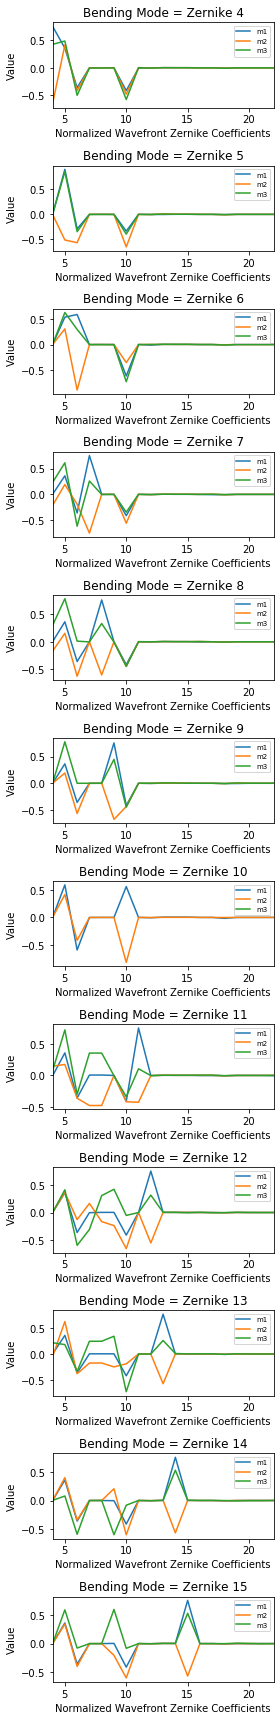

In [61]:
west = WavefrontEstimator()
fx, fy = 1.15, 1.15
tel = ZernikeTelescope.nominal()
tel.update(st)
wsim = WavefrontSimulator()
wf = wsim.simulateWavefront(tel.optic, fx, fy)
nom = west.estimate(wf)[4:]

xs = []
for i in range(4,16):
    st = ZernikeState()
    st[f'm1zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef1 = west.estimate(wf)[4:] - nom
    coef1 /= np.linalg.norm(coef1)
    xs.append(coef1)
    
    st = ZernikeState()
    st[f'm2zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef2 = west.estimate(wf)[4:] - nom
    coef2 /= np.linalg.norm(coef2)
    xs.append(coef2)
    
    st = ZernikeState()
    st[f'm3zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef3 = west.estimate(wf)[4:] - nom
    coef3 /= np.linalg.norm(coef3)
    xs.append(coef3)
    
    plt.subplot(12,1,i-3)
    plt.title(f'Bending Mode = Zernike {i}')
    plt.plot(range(4,23), coef1, label='m1')
    plt.plot(range(4,23), coef2, label='m2')
    plt.plot(range(4,23), coef3, label='m3')
    plt.xlim([4,22])
    plt.ylabel('Value')
    plt.xlabel('Normalized Wavefront Zernike Coefficients')
    plt.legend(fontsize=7)
plt.gcf().set_size_inches((4,24))
plt.tight_layout()
plt.savefig('bendingModesDegeneracyCornerNominal.png', bbox='tight', dpi=180);

/labs/khatrilab/scottmk/Software/miniconda37/envs/core/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


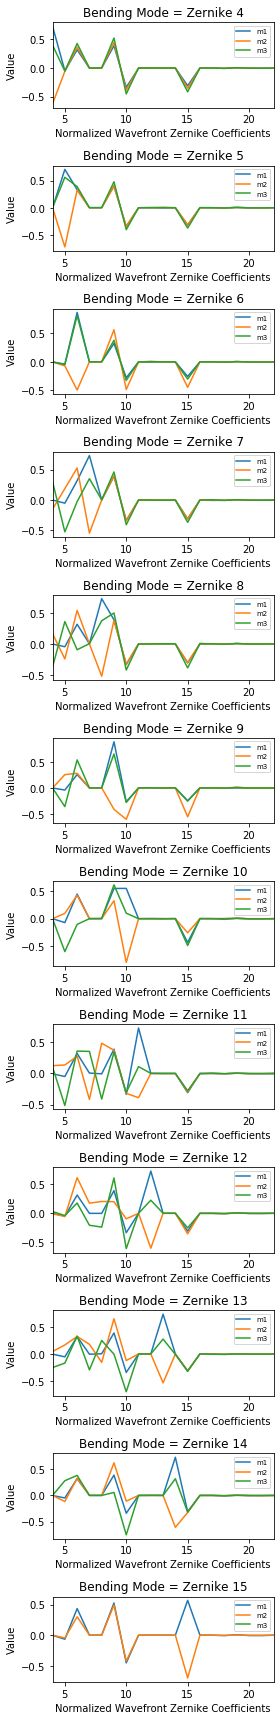

In [63]:
west = WavefrontEstimator()
fx, fy = -1.28, 1.10
tel = ZernikeTelescope.nominal()
tel.update(st)
wsim = WavefrontSimulator()
wf = wsim.simulateWavefront(tel.optic, fx, fy)
nom = west.estimate(wf)[4:]

xs = []
for i in range(4,16):
    st = ZernikeState()
    st[f'm1zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef1 = west.estimate(wf)[4:] - nom
    coef1 /= np.linalg.norm(coef1)
    xs.append(coef1)
    
    st = ZernikeState()
    st[f'm2zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef2 = west.estimate(wf)[4:] - nom
    coef2 /= np.linalg.norm(coef2)
    xs.append(coef2)
    
    st = ZernikeState()
    st[f'm3zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef3 = west.estimate(wf)[4:] - nom
    coef3 /= np.linalg.norm(coef3)
    xs.append(coef3)
    
    plt.subplot(12,1,i-3)
    plt.title(f'Bending Mode = Zernike {i}')
    plt.plot(range(4,23), coef1, label='m1')
    plt.plot(range(4,23), coef2, label='m2')
    plt.plot(range(4,23), coef3, label='m3')
    plt.xlim([4,22])
    plt.ylabel('Value')
    plt.xlabel('Normalized Wavefront Zernike Coefficients')
    plt.legend(fontsize=7)
plt.gcf().set_size_inches((4,24))
plt.tight_layout()
plt.savefig('bendingModesDegeneracyCornerNominalOther.png', bbox='tight', dpi=180);

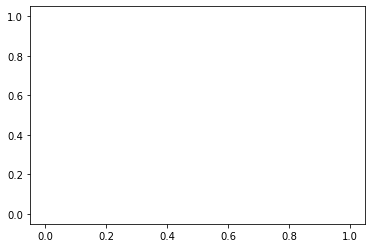

In [67]:
foo = np.array(xs)
plt.plot(foo[-1])

In [40]:
west = WavefrontEstimator()
fx, fy = 1.15, 1.15
xs = []
for i in range(4,11):
    st = ZernikeState()
    st[f'm1zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef1 = west.estimate(wf)[4:]
    coef1 /= np.linalg.norm(coef1)
    xs.append(coef1)
    
    st = ZernikeState()
    st[f'm2zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef2 = west.estimate(wf)[4:]
    coef2 /= np.linalg.norm(coef2)
    xs.append(coef2)
    
    
    st = ZernikeState()
    st[f'm3zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, fx, fy)
    coef3 = west.estimate(wf)[4:]
    coef3 /= np.linalg.norm(coef3)
    xs.append(coef3)

In [41]:
xs.append(np.ones(19))

In [43]:
X = np.array(xs[3:])
X.shape

(19, 19)

In [44]:
beta = np.random.standard_normal(19)

In [45]:
X.shape

(19, 19)

In [46]:
y = X @ beta.T

In [48]:
beta_hat = np.linalg.pinv(X) @ y

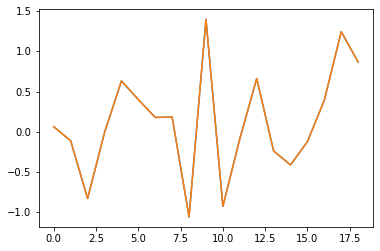

In [50]:
plt.plot(beta)
plt.plot(beta_hat)

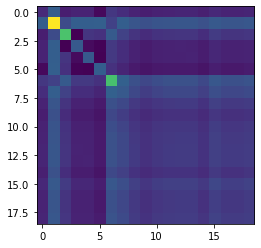

In [54]:
plt.imshow(np.cov(X.T))

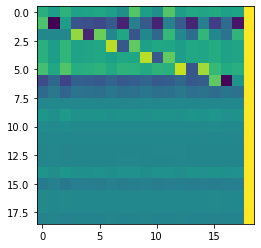

In [57]:
plt.imshow(X.T)

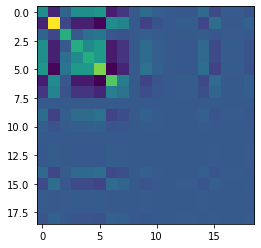

In [52]:
plt.imshow(X.T @ X)

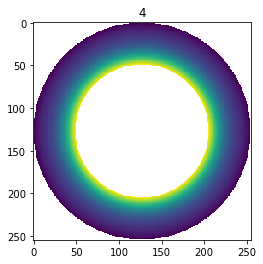

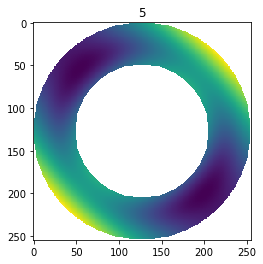

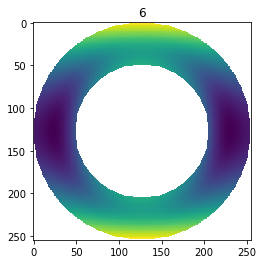

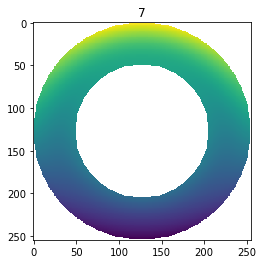

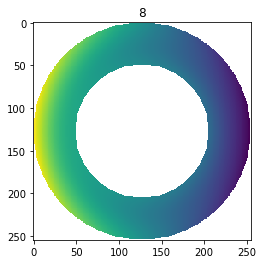

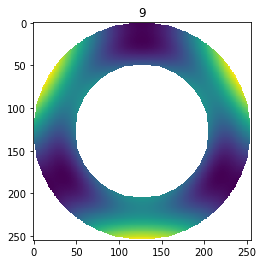

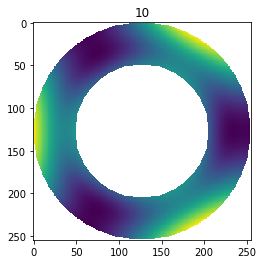

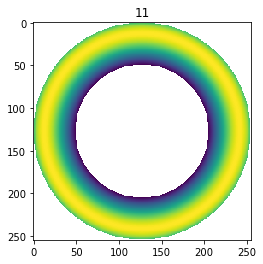

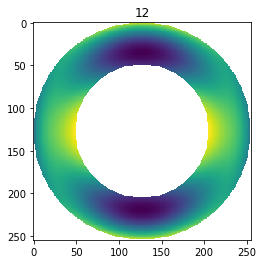

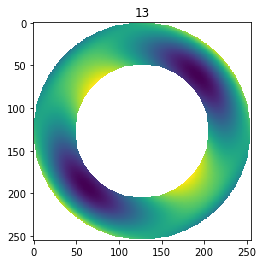

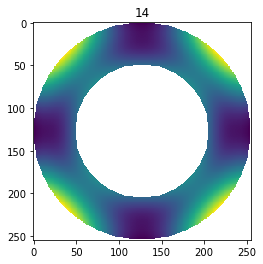

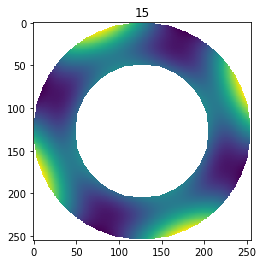

In [6]:
for i in range(4,16):
    st = ZernikeState()
    st[f'm2zer{i}'] = 1e-7
    tel = ZernikeTelescope.nominal()
    tel.update(st)
    wsim = WavefrontSimulator()
    wf = wsim.simulateWavefront(tel.optic, 0, 0)
    plt.figure()
    plt.title(i)
    plt.imshow(wf)